# Start

In [1]:
import torch
import numpy as np
from evals.utils import calc_scores, combine_scores

from matplotlib import pyplot as plt
plt.style.use('tableau-colorblind10')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmu-serif",
    "mathtext.fontset": "cm",
    "font.size": 20
})

/home/hila/MusicInversion/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/hila/MusicInversion/venv/lib/python3.8/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


# Params

In [2]:
ours_dirs = ["code/results/MusicDeltaDB_noreplace/audioldm2-music",
             "code/results/MusicDeltaDB_noreplace_cfg/audioldm2-music",
             "code/results/MusicDeltaDB_noreplace_cfgsrc/audioldm2-music",
             "code/results/MusicDeltaDB_noreplace/audioldm2-music",
             "code/results/MusicDeltaDB_noreplace/audioldm2-music",
             ]
sdedit_dirs = ["code/results/MusicDeltaDB_sdedit_noreplace/audioldm2-music",
               "code/results/MusicDeltaDB_sdedit_noreplace_cfg/audioldm2-music",
               "code/results/MusicDeltaDB_sdedit_noreplace/audioldm2-music",
               "code/results/MusicDeltaDB_sdedit_noreplace/audioldm2-music",
               "code/results/MusicDeltaDB_sdedit_noreplace/audioldm2-music",
               ]
ddim_dirs = ["code/results/MusicDeltaDB_ddim_noreplace/audioldm2-music",
             "code/results/MusicDeltaDB_ddim_noreplace_cfg/audioldm2-music",
             "code/results/MusicDeltaDB_ddim_noreplace_cfgsrc/audioldm2-music",
             "code/results/MusicDeltaDB_ddim_noreplace_skips/audioldm2-music",
             "code/results/MusicDeltaDB_ddim_noreplace_100tarcfg/audioldm2-music",
             ]


musicgen_dir = "audiocraft/Outputs/MusicDeltaDB_MusicGen_noreplace/musicgen-melody"
inputs_orig = "inputs/MusicDelta/"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

clap_model_path = 'music_audioset_epoch_15_esc_90.14.pt'
# pt_path = f'evals/eval_checkpoints/tot_results_{clap_model_path}.pt' 
pt_path = f'evals/eval_checkpoints/tot_results_fix_{clap_model_path}.pt'

# Calc

In [3]:
scores = calc_scores(clap_model_path, device, ours_dirs, sdedit_dirs, musicgen_dir, ddim_dirs, inputs_orig,
                     prev_pt=pt_path,
                     win_length=10 if 'fusion' not in clap_model_path else None,
                     overlap=0.1,
                     method='mean')
torch.save({'scores': scores}, pt_path)


/home/hila/MusicInversion/venv/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 26%|██▌       | 9/35 [00:25<01:08,  2.64s/it]

['dec_A_recording_of_a_happy_upbeat_rock_song.__neg__', 'dec_A_recording_of_a_happy_upbeat_techno_song.__neg__', 'dec_A_recording_of_a_happy_upbeat_jazz_song.__neg__']
['dec_A_recording_of_a_happy_upbeat_blues_song.__neg__', 'dec_A_recording_of_a_happy_upbeat_classical_music_piece.__neg__', 'dec_A_recording_of_a_happy_upbeat_arcade_game_soundtrack.__neg__']
Skipping MusicDelta_Vivaldi_MIX, A recording of a happy upbeat classical music piece., A recording of a happy upbeat classical music piece.
['dec_A_strings_section_playing_classical_music.__neg__', 'dec_A_synthesizer_playing_techno_music.__neg__', 'dec_A_metal_band_playing_metal_music.__neg__']
Skipping MusicDelta_Vivaldi_MIX, A strings section playing classical music., A strings section playing classical music.
['dec_A_high_quality_recording_of_a_piano_playing_a_happy_song.__neg__', 'dec_A_high_quality_recording_of_a_country_band_playing_a_happy_song.__neg__', 'dec_A_high_quality_recording_of_a_jazz_band_playing_a_happy_song.__neg_

 29%|██▊       | 10/35 [13:27<1:41:23, 243.35s/it]

Skipping MusicDelta_Vivaldi_MIX, A high quality recording of strings playing a happy song., A high quality recording of strings playing a happy song.


100%|██████████| 35/35 [17:18<00:00, 29.68s/it]   


# Load

In [4]:
scores = torch.load(pt_path)['scores']
clap_res, lpaps_res = combine_scores(scores)


# Figures

## CLAP vs. LPAPS

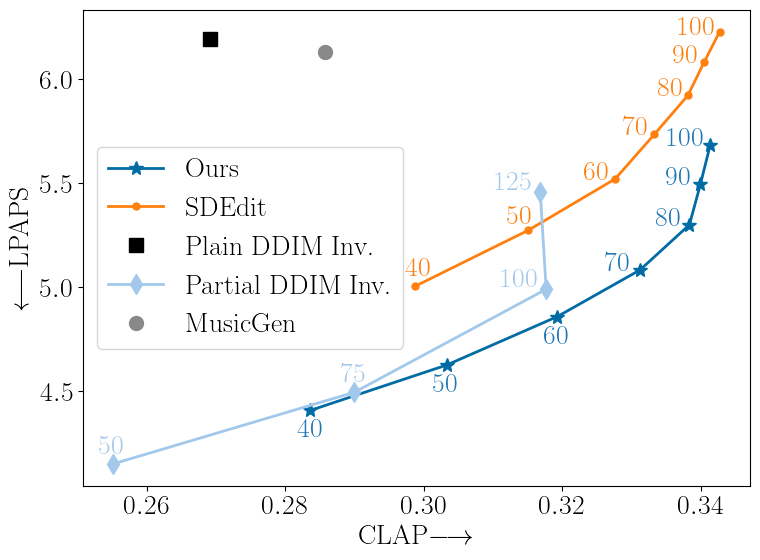

In [32]:
ours_skips = [160, 150, 140, 130, 120, 110, 100]
ours_clap = ([clap_res.ours[(clap_res.ours['skip'] == skip) &(clap_res.ours['srccfg'] == 3) & (clap_res.ours['tarcfg'] == 12)]['clap_score'].mean() for skip in ours_skips])
ours_lpaps = ([lpaps_res.ours[(lpaps_res.ours['skip'] == skip) & (lpaps_res.ours['srccfg'] == 3) & (lpaps_res.ours['tarcfg'] == 12)]['lpaps_score'].mean() for skip in ours_skips])

sdedit_skips = [160, 150, 140, 130, 120, 110,100]
sdedit_clap = ([clap_res.sdedit[(clap_res.sdedit['skip'] == skip) & (clap_res.sdedit['tarcfg'] == 12)]['clap_score'].mean() for skip in sdedit_skips])
sdedit_lpaps = ([lpaps_res.sdedit[(lpaps_res.sdedit['skip'] == skip) & (lpaps_res.sdedit['tarcfg'] == 12)]['lpaps_score'].mean() for skip in sdedit_skips])

ddim_skips = [150, 125, 100, 75, 0]
ddim_clap = ([clap_res.ddim[(clap_res.ddim['skip'] == skip) & (lpaps_res.ddim['srccfg'] == 3) & (lpaps_res.ddim['tarcfg'] == 5)]['clap_score'].mean() for skip in ddim_skips])
ddim_lpaps = ([lpaps_res.ddim[(lpaps_res.ddim['skip'] == skip) & (lpaps_res.ddim['srccfg'] == 3) & (lpaps_res.ddim['tarcfg'] == 5)]['lpaps_score'].mean() for skip in ddim_skips])    

ours_tstarts = 200 - np.array(ours_skips)
sdedit_tstarts = 200 - np.array(sdedit_skips)
ddim_tstarts = 200 - np.array(ddim_skips)

musicgen_clap = clap_res.musicgen['clap_score'].mean()
musicgen_lpaps = lpaps_res.musicgen['lpaps_score'].mean()

shift_x = -0.004
shift_y = -0.005

plt.figure(figsize=(8,6))
plt.plot(ours_clap, ours_lpaps, label='Ours', marker='*', markersize=10, linewidth=2)
for i, s in enumerate(ours_tstarts):
    if i == len(ours_tstarts) - 1:
        plt.text(ours_clap[i] - 0.0063, ours_lpaps[i] + shift_y, f'{s}', color='tab:blue')
    elif i < 3 :
        plt.text(ours_clap[i] - 0.002, ours_lpaps[i] - 0.13, f'{s}', color='tab:blue')
    else:
        plt.text(ours_clap[i] + shift_x-0.001, ours_lpaps[i] + shift_y, f'{s}', color='tab:blue')

plt.plot(sdedit_clap, sdedit_lpaps, label='SDEdit', marker='.', markersize=10, linewidth=2)
for i, s in enumerate(sdedit_tstarts):
    if i == 0 :
        plt.text(sdedit_clap[i] - 0.0015 , sdedit_lpaps[i] +0.05, f'{s}', color='tab:orange')
    elif i == 1 :
        plt.text(sdedit_clap[i] -0.003 , sdedit_lpaps[i] +0.03, f'{s}', color='tab:orange')
    elif i == len(sdedit_tstarts) - 1:
        plt.text(sdedit_clap[i] - 0.006, sdedit_lpaps[i] + shift_y-0.01, f'{s}', color='tab:orange')
    else:
        plt.text(sdedit_clap[i] + shift_x-0.0005, sdedit_lpaps[i] + shift_y, f'{s}', color='tab:orange')

plt.plot(ddim_clap[-1], ddim_lpaps[-1], label='Plain DDIM Inv.', marker='s', linewidth=0, color='black', markersize=10)
plt.plot(ddim_clap[:-1], ddim_lpaps[:-1], label='Partial DDIM Inv.', marker='d', linewidth=2, color='#A2C8EC', markersize=10)
for i, s in enumerate(ddim_tstarts[:-1]):
    if i < 2:
        plt.text(ddim_clap[i] - 0.002, ddim_lpaps[i] +0.05, f'{s}', color='#A2C8EC')
    else:
        plt.text(ddim_clap[i] -0.0065, ddim_lpaps[i] +0.01, f'{s}', color='#A2C8EC')

plt.plot(musicgen_clap, musicgen_lpaps, label='MusicGen', marker='o', linewidth=0, color='#898989', markersize=10)

plt.xlabel('CLAP$\\longrightarrow$')
plt.ylabel('$\longleftarrow$LPAPS')
plt.legend(loc='center left')#, bbox_to_anchor=(0, 0.45))
plt.tight_layout()
plt.savefig(f'figures/Sup_LPAPS_CLAP_{clap_model_path}_ddim.pdf', pad_inches=0.01, bbox_inches='tight')
plt.show()


## Target CFG Strengths

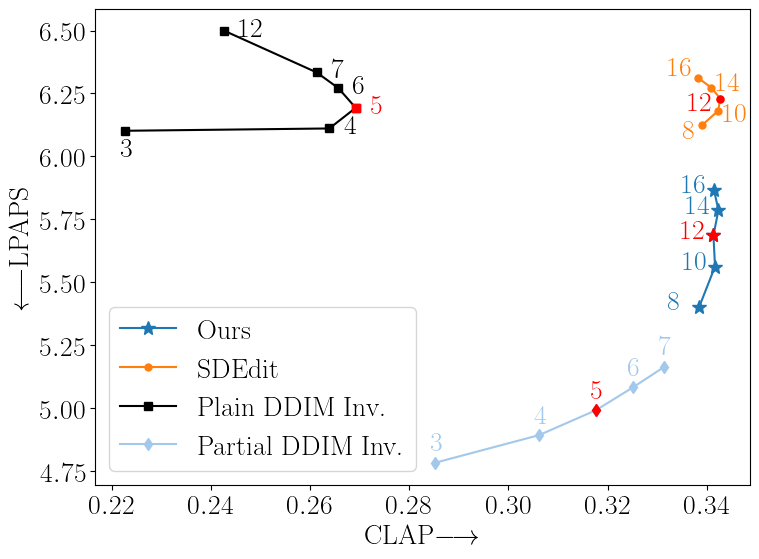

In [19]:

our_cfgs = sorted(clap_res.ours.tarcfg.unique())
ours_clap_skip100 = [clap_res.ours[(clap_res.ours['skip'] == 100) & (clap_res.ours['srccfg'] == 3) & (clap_res.ours['tarcfg'] == cfg)]['clap_score'].mean() for cfg in our_cfgs]
ours_lpaps_skip100 = [lpaps_res.ours[(lpaps_res.ours['skip'] == 100) & (lpaps_res.ours['srccfg'] == 3) & (lpaps_res.ours['tarcfg'] == cfg)]['lpaps_score'].mean() for cfg in our_cfgs]

sdedit_cfgs = sorted(clap_res.sdedit.tarcfg.unique())
sdedit_clap_skip100 = [clap_res.sdedit[(clap_res.sdedit['skip'] == 100) & (clap_res.sdedit['tarcfg'] == cfg)]['clap_score'].mean() for cfg in sdedit_cfgs]
sdedit_lpaps_skip100 = [lpaps_res.sdedit[(lpaps_res.sdedit['skip'] == 100) & (lpaps_res.sdedit['tarcfg'] == cfg)]['lpaps_score'].mean() for cfg in sdedit_cfgs]

ddim_cfgs = sorted(clap_res.ddim.tarcfg.unique())
ddim_clap_skip0 = [clap_res.ddim[(clap_res.ddim['skip'] == 0) & (clap_res.ddim['tarcfg'] == cfg) & (clap_res.ddim['srccfg'] == 3)]['clap_score'].mean() for cfg in ddim_cfgs]
ddim_lpaps_skip0 = [lpaps_res.ddim[(lpaps_res.ddim['skip'] == 0) & (lpaps_res.ddim['srccfg'] == 3) & (lpaps_res.ddim['tarcfg'] == cfg)]['lpaps_score'].mean() for cfg in ddim_cfgs]

ddim_clap_skip100 = [clap_res.ddim[(clap_res.ddim['skip'] == 100) & (clap_res.ddim['tarcfg'] == cfg) & (clap_res.ddim['srccfg'] == 3)]['clap_score'].mean() for cfg in ddim_cfgs[:-1]]
ddim_lpaps_skip100 = [lpaps_res.ddim[(lpaps_res.ddim['skip'] == 100) & (lpaps_res.ddim['srccfg'] == 3) & (lpaps_res.ddim['tarcfg'] == cfg)]['lpaps_score'].mean() for cfg in ddim_cfgs[:-1]]

musicgen_clap = clap_res.musicgen['clap_score'].mean()
musicgen_lpaps = lpaps_res.musicgen['lpaps_score'].mean()

shift_x = -0.004
shift_y = -0.005

plt.figure(figsize=(8,6))

plt.plot(ours_clap_skip100, ours_lpaps_skip100, label='Ours', marker='*', markersize=10, linewidth=1.5, color="tab:blue")
for i, s in enumerate(our_cfgs):
    if i == 2:
        plt.text(ours_clap_skip100[i] - 0.0065, ours_lpaps_skip100[i] - 0.01,  f'{s}', color='red')
        plt.plot(ours_clap_skip100[i], ours_lpaps_skip100[i], marker='*', markersize=10, color='red')
    else:
        plt.text(ours_clap_skip100[i] - 0.0065, ours_lpaps_skip100[i] - 0.01,  f'{s}', color='tab:blue')

plt.plot(sdedit_clap_skip100, sdedit_lpaps_skip100, label='SDEdit', marker='.', markersize=10, linewidth=1.5, color="tab:orange")
for i, s in enumerate(sdedit_cfgs):
    if i == 0:
        plt.text(sdedit_clap_skip100[i] - 0.004, sdedit_lpaps_skip100[i] -0.05, f'{s}', color='tab:orange')
    elif i == 1:
        plt.text(sdedit_clap_skip100[i] + 0.001, sdedit_lpaps_skip100[i] -0.04, f'{s}', color='tab:orange')
    elif i==2:
        plt.text(sdedit_clap_skip100[i] - 0.0065, sdedit_lpaps_skip100[i] -0.045, f'{s}', color='red')
        plt.plot(sdedit_clap_skip100[i], sdedit_lpaps_skip100[i], marker='.', markersize=10, color='red')
    elif i == 3:
        plt.text(sdedit_clap_skip100[i] + 0.001, sdedit_lpaps_skip100[i] -0.01, f'{s}', color='tab:orange')
    elif i == len(sdedit_cfgs) - 1:
        plt.text(sdedit_clap_skip100[i] - 0.006, sdedit_lpaps_skip100[i] +0.01, f'{s}', color='tab:orange')

plt.plot(ddim_clap_skip0, ddim_lpaps_skip0, label='Plain DDIM Inv.', marker='s', markersize=6, linewidth=1.5, color="black")
for i, s in enumerate(ddim_cfgs):
    if i == 0 :
        plt.text(ddim_clap_skip0[i] - 0.001, ddim_lpaps_skip0[i] - 0.1, f'{s}', color='black')
    elif i == 2:
        plt.text(ddim_clap_skip0[i] + 0.003, ddim_lpaps_skip0[i] - 0.02, f'{s}', color='red')
        plt.plot(ddim_clap_skip0[i], ddim_lpaps_skip0[i], marker='s', markersize=6, color='red')
    else:
        plt.text(ddim_clap_skip0[i] + 0.003, ddim_lpaps_skip0[i] - 0.02, f'{s}', color='black')

plt.plot(ddim_clap_skip100, ddim_lpaps_skip100, label='Partial DDIM Inv.', marker='d', markersize=6, linewidth=1.5, color="#A2C8EC")
for i, s in enumerate(ddim_cfgs[:-1]):
    # if i == 0 :
        # plt.text(ddim_clap_skip100[i] - 0.001, ddim_lpaps_skip100[i] - 0.1, f'{s}', color='black')
    # elif i == 2:
    if i == 2:
        plt.text(ddim_clap_skip100[i] -  0.001, ddim_lpaps_skip100[i] + 0.05, f'{s}', color='red')
        plt.plot(ddim_clap_skip100[i], ddim_lpaps_skip100[i], marker='d', markersize=6, color='red')
    else:
        plt.text(ddim_clap_skip100[i] - 0.001, ddim_lpaps_skip100[i] + 0.05, f'{s}', color='#A2C8EC')


plt.xlabel('CLAP$\\longrightarrow$')
plt.ylabel('$\longleftarrow$LPAPS')
plt.legend(loc='lower left')#, bbox_to_anchor=(0, 0.45))
plt.tight_layout()
plt.savefig(f'figures/cfg_target.pdf', pad_inches=0.01, bbox_inches='tight')
plt.show()


## Source CFG Strengths

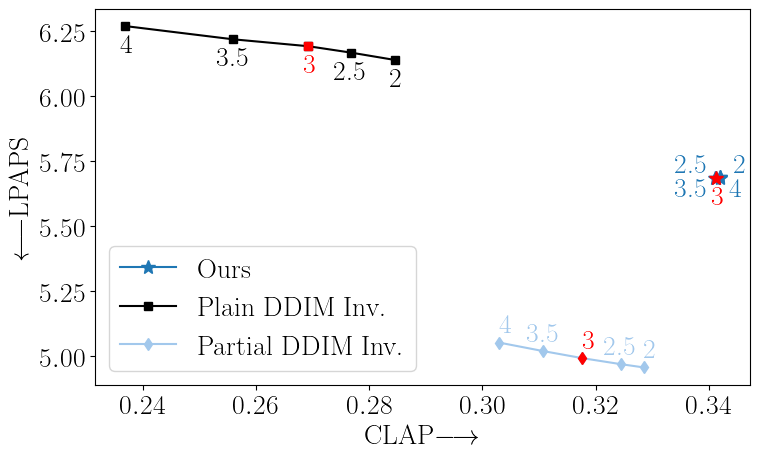

In [20]:
our_srccfgs = sorted(clap_res.ours.srccfg.unique())
ours_clap_skip100 = [clap_res.ours[(clap_res.ours['skip'] == 100) & (clap_res.ours['tarcfg'] == 12) & (clap_res.ours['srccfg'] == cfg)]['clap_score'].mean() for cfg in our_srccfgs]
ours_lpaps_skip100 = [lpaps_res.ours[(lpaps_res.ours['skip'] == 100) & (lpaps_res.ours['tarcfg'] == 12) & (clap_res.ours['srccfg'] == cfg)]['lpaps_score'].mean() for cfg in our_srccfgs]

ddim_cfgs = sorted(clap_res.ddim.srccfg.unique())
ddim_clap_skip0 = [clap_res.ddim[(clap_res.ddim['skip'] == 0) & (clap_res.ddim['tarcfg'] == 5) & (clap_res.ddim['srccfg'] == cfg)]['clap_score'].mean() for cfg in ddim_cfgs]
ddim_lpaps_skip0 = [lpaps_res.ddim[(lpaps_res.ddim['skip'] == 0) & (lpaps_res.ddim['tarcfg'] == 5) & (lpaps_res.ddim['srccfg'] == cfg)]['lpaps_score'].mean() for cfg in ddim_cfgs]

ddim_clap_skip100 = [clap_res.ddim[(clap_res.ddim['skip'] == 100) & (clap_res.ddim['tarcfg'] == 5) & (clap_res.ddim['srccfg'] == cfg)]['clap_score'].mean() for cfg in ddim_cfgs]
ddim_lpaps_skip100 = [lpaps_res.ddim[(lpaps_res.ddim['skip'] == 100) & (lpaps_res.ddim['tarcfg'] == 5) & (lpaps_res.ddim['srccfg'] == cfg)]['lpaps_score'].mean() for cfg in ddim_cfgs]

shift_x = -0.004
shift_y = -0.005

plt.figure(figsize=(8,5))
plt.plot(ours_clap_skip100, ours_lpaps_skip100, label='Ours', marker='*', markersize=10, linewidth=1.5, color="tab:blue")
for i, s in enumerate(our_srccfgs):
    if s % 1 == 0:
        s = int(s)
    if s == 3:
        plt.text(ours_clap_skip100[i] - 0.001, ours_lpaps_skip100[i] - 0.1,  f'{int(s)}', color='red')
        plt.plot(ours_clap_skip100[i], ours_lpaps_skip100[i], marker='*', markersize=10, color='red')
    else:
        plt.text(ours_clap_skip100[i] - (i%2)*0.008 + (1-i%2)*0.0025,
                ours_lpaps_skip100[i] - (i>2)*0.07 + (i<=2)*0.02,  f'{s}', color='tab:blue')

plt.plot(ddim_clap_skip0, ddim_lpaps_skip0, label='Plain DDIM Inv.', marker='s', markersize=6, linewidth=1.5, color="black")
for i, s in enumerate(ddim_cfgs):
    if s == 3.0:
        plt.text(ddim_clap_skip0[i] - 0.001, ddim_lpaps_skip0[i] - 0.1, f'{int(s)}', color='red')
        plt.plot(ddim_clap_skip0[i], ddim_lpaps_skip0[i], marker='s', markersize=6, color='red')
    elif s % 1 == 0:
        plt.text(ddim_clap_skip0[i] - 0.001, ddim_lpaps_skip0[i] - 0.1, f'{int(s)}', color='black')
    else:
        plt.text(ddim_clap_skip0[i] - 0.003, ddim_lpaps_skip0[i] - 0.1, f'{s}', color='black')

plt.plot(ddim_clap_skip100, ddim_lpaps_skip100, label='Partial DDIM Inv.', marker='d', markersize=6, linewidth=1.5, color="#A2C8EC")
for i, s in enumerate(ddim_cfgs):
    if s == 3.0:
        plt.text(ddim_clap_skip100[i], ddim_lpaps_skip100[i] + 0.04, f'{int(s)}', color='red')
        plt.plot(ddim_clap_skip100[i], ddim_lpaps_skip100[i], marker='d', markersize=6, color='red')
    elif s % 1 == 0:
        plt.text(ddim_clap_skip100[i], ddim_lpaps_skip100[i]+0.04, f'{int(s)}', color='#A2C8EC')
    else:
        plt.text(ddim_clap_skip100[i]-0.003, ddim_lpaps_skip100[i]+0.04, f'{s}', color='#A2C8EC')

plt.xlabel('CLAP$\\longrightarrow$')
plt.ylabel('$\longleftarrow$LPAPS')
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig(f'figures/cfg_source.pdf', pad_inches=0.01, bbox_inches='tight')
plt.show()
